# **Deep Learning Lab: Transfer Learning**

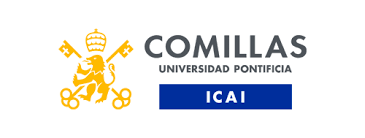

***

## Import packages

In [3]:
import cnn
from cnn import CNN
import torchvision
import torchvision.transforms as transforms
from cnn import load_data
from cnn import load_model_weights
from torchvision.models import EfficientNet_B7_Weights
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


## Model and data loading

In [29]:
# Pytorch has many pre-trained models that can be used for transfer learning
classification_models = torchvision.models.list_models(module=torchvision.models)
print(classification_models)

['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'googlenet', 'inception_v3', 'maxvit_t', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf', 'regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 'regnet_y_3_2gf', 'regnet_y_400mf', 'regnet_y_800mf', 'regnet_y_8gf', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext101_64x4d', 'resnext50_32x4d', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'squeezenet1_0

In [4]:
# Load data and model 
train_dir = './dataset/training'
valid_dir = './dataset/validation'


train_loader, valid_loader, num_classes = load_data(train_dir, 
                                                    valid_dir, 
                                                    batch_size=32, 
                                                    img_size=380) # ResNet50 requires 224x224 images
model = CNN(torchvision.models.efficientnet_b7(weights=EfficientNet_B7_Weights.IMAGENET1K_V1), num_classes,1)
model.classifier[3] = nn.Linear(model.classifier[3].in_features,num_classes)
device = torch.device("cpu")
model.to(device)
print(model)

CNN(
  (base_model): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
              (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_ac

2 Forest
1 Coast
6 Kitchen
11 Store
2 Forest
3 Highway
8 Mountain
11 Store
4 Industrial
13 Suburb
7 Living room
0 Bedroom
5 Inside city
12 Street
4 Industrial
7 Living room
1 Coast
10 Open country
14 Tall building
12 Street
1 Coast
11 Store
7 Living room
10 Open country
8 Mountain
1 Coast
10 Open country
12 Street
5 Inside city
5 Inside city
4 Industrial
10 Open country
3 Highway
6 Kitchen
11 Store
5 Inside city
12 Street
5 Inside city
11 Store
13 Suburb
2 Forest
2 Forest
12 Street
5 Inside city
13 Suburb
0 Bedroom
14 Tall building
4 Industrial
12 Street
8 Mountain
10 Open country
3 Highway
9 Office
10 Open country
6 Kitchen
2 Forest
5 Inside city
12 Street
7 Living room
1 Coast
12 Street
10 Open country
6 Kitchen
3 Highway
14 Tall building
0 Bedroom
4 Industrial
12 Street
3 Highway
6 Kitchen
13 Suburb
1 Coast
5 Inside city
8 Mountain
11 Store
11 Store
6 Kitchen
0 Bedroom
13 Suburb
5 Inside city
8 Mountain
9 Office
7 Living room
13 Suburb
0 Bedroom
3 Highway
11 Store
0 Bedroom
14 Tall 

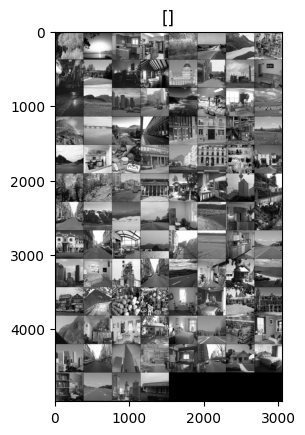

In [9]:
# Visualize a few images
import numpy as np
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a few random images
random_indices = np.random.choice(len(valid_loader.dataset), size=100, replace=False)
inputs = []
classes = []
classnames = train_loader.dataset.classes
for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    print(valid_loader.dataset[i][1],classnames[valid_loader.dataset[i][1]])
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[classnames[x] for x in classes])

## Train

In [37]:
import random
import wandb

# Start a new wandb run to track this script.
run = wandb.init(
    # Set the wandb entity where your project will be logged (generally your team name).
    entity="202410994-universidad-pontificia-comillas",
    name = "Efficient-b7",
    # Set the wandb project where this run will be logged.
    project="Practica_ML2",
    # Track hyperparameters and run metadata.
    config={
        "learning_rate": 0.0025,
        "architecture": "efficientNet-b7",
        "dataset": "custom",
        "epochs": 8,
    }
)

optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4,weight_decay=0.9,momentum=0.9)
criterion = nn.CrossEntropyLoss()
history = model.train_model(train_loader, valid_loader, optimizer, criterion, epochs=8)

AttributeError: 'CNN' object has no attribute 'fc'

In [ ]:
model.save_model('EfficientNet_B0-8epochs')

## Predict

#### Load model

In [10]:
# Load model
model_weights = load_model_weights('resnet50-1epoch')
my_trained_model = CNN(torchvision.models.resnet50(weights='DEFAULT'), num_classes)
my_trained_model.load_state_dict(model_weights)

<All keys matched successfully>

## Results

In [ ]:
predicted_labels = my_trained_model.predict(valid_loader)

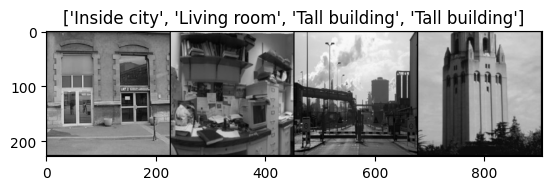

In [ ]:
# Get a few random images
random_indices = np.random.choice(len(valid_loader.dataset), size=4, replace=False)
inputs = []
classes = []
for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    classes.append(predicted_labels[i])

out = torchvision.utils.make_grid(inputs)
classnames = train_loader.dataset.classes

